<a href="https://colab.research.google.com/github/LanceMacNal1/Group3_CSS145_Activity3/blob/main/CSS145_Group3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 3, Section BM7

Members:


*   LANCE NATHANIEL B. MACALALAD
*   RUSKIN GIAN A. LAUGUICO
*   MARC DAVE D. CONSTANTINO
*   CRAIG ZYRUS B. MANUEL
*   JEAN L. LOPEZ

---

**ABOUT**
The project will focus on Customer prediction, to be more specific, the most purchased product (Given by the dataset). The group decisded to use K-Means Clustering and Decision Tree to predict our data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree

if 'sc' in locals():
    sc.stop()

conf = SparkConf().setAppName("MyApp").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [ ]:
!pip install opendatasets --upgrade
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:

In [ ]:
#df = pd.read_csv("customer-personality-analysis/marketing_campaign.csv", sep="\t")
df = spark.read.format("csv").option("delimiter", "\t").option("header", "true").load("customer-personality-analysis/marketing_campaign.csv")
df.createOrReplaceTempView("mkt_campaign")
df.show()
print("Total Rows:",df.count(),"\n")

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [ ]:
df1 = spark.sql("select * from mkt_campaign where \
ID IS NULL OR \
year_birth IS NULL OR \
education IS NULL OR \
marital_status IS NULL OR \
income IS NULL OR \
kidhome IS NULL OR \
teenhome IS NULL OR \
dt_customer IS NULL OR \
recency IS NULL OR \
mntwines IS NULL OR \
mntfruits IS NULL OR \
mntmeatproducts IS NULL OR \
mntfishproducts IS NULL OR \
mntsweetproducts IS NULL OR \
mntgoldprods IS NULL OR \
numdealspurchases IS NULL OR \
numwebpurchases IS NULL OR \
numcatalogpurchases IS NULL OR \
numstorepurchases IS NULL OR \
numwebvisitsmonth IS NULL OR \
acceptedcmp3 IS NULL OR \
acceptedcmp4 IS NULL OR \
acceptedcmp5 IS NULL OR \
acceptedcmp1 IS NULL OR \
acceptedcmp2 IS NULL OR \
complain IS NULL OR \
z_costcontact IS NULL OR \
z_revenue IS NULL OR \
response IS NULL")


df1.show()

print("Total Rows:",df1.count())
print("Total Null rows:", df1.count(),"\n")

+-----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|   ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+-----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+-------

In [ ]:
df2 = spark.sql("select * from mkt_campaign where \
ID IS NOT NULL AND \
year_birth IS NOT NULL AND \
education IS NOT NULL AND \
marital_status IS NOT NULL AND \
income IS NOT NULL AND \
kidhome IS NOT NULL AND \
teenhome IS NOT NULL AND \
dt_customer IS NOT NULL AND \
recency IS NOT NULL AND \
mntwines IS NOT NULL AND \
mntfruits IS NOT NULL AND \
mntmeatproducts IS NOT NULL AND \
mntfishproducts IS NOT NULL AND \
mntsweetproducts IS NOT NULL AND \
mntgoldprods IS NOT NULL AND \
numdealspurchases IS NOT NULL AND \
numwebpurchases IS NOT NULL AND \
numcatalogpurchases IS NOT NULL AND \
numstorepurchases IS NOT NULL AND \
numwebvisitsmonth IS NOT NULL AND \
acceptedcmp3 IS NOT NULL AND \
acceptedcmp4 IS NOT NULL AND \
acceptedcmp5 IS NOT NULL AND \
acceptedcmp1 IS NOT NULL AND \
acceptedcmp2 IS NOT NULL AND \
complain IS NOT NULL AND \
z_costcontact IS NOT NULL AND \
z_revenue IS NOT NULL AND \
response IS NOT NULL")


df2.show()
print("Total Rows:",df.count())
print("Total Null rows:", df1.count())
print("Total Not Null rows:", df2.count(),"\n")
df = df2.toPandas()


+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


<ipython-input-26-f25be7a63550>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='TotalSales', data=total_sales_df, palette='viridis')


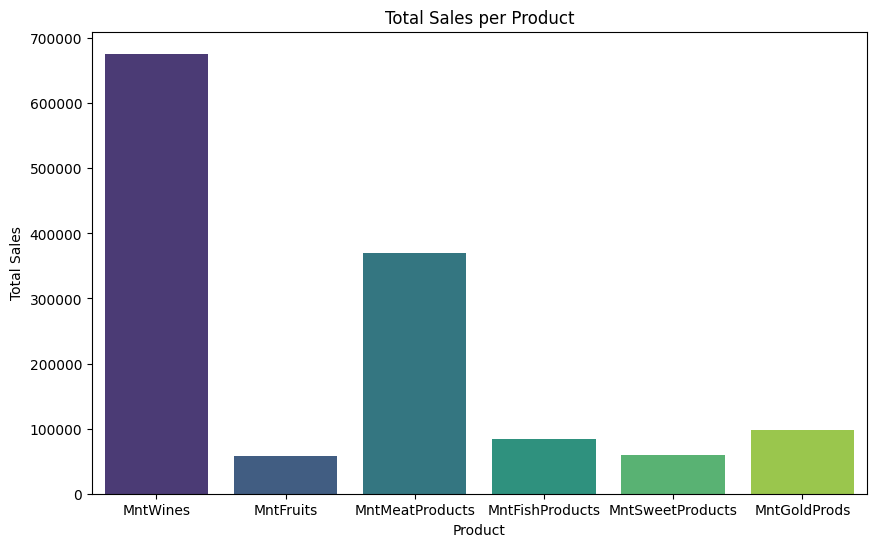

In [ ]:
# Calculate the total sales for each product
purchase_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
total_sales = df[purchase_columns].sum()

# Convert to DataFrame for easier plotting
total_sales_df = total_sales.reset_index()
total_sales_df.columns = ['Product', 'TotalSales']

# Plot using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='TotalSales', data=total_sales_df, palette='viridis')

# Adding labels and title
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

In [ ]:

print("Purchase Columns:", purchase_columns)

total_sales = df[purchase_columns].sum()
print("Total Sales Data:", total_sales)

Purchase Columns: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Total Sales Data: MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64


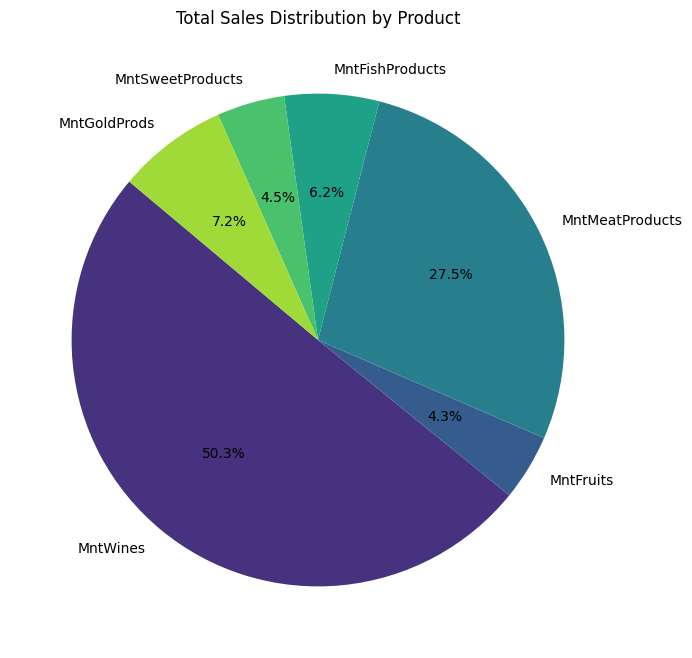

In [ ]:
total_sales = pd.to_numeric(df[purchase_columns].sum(), errors='coerce').fillna(0)

# Filter out zero values
total_sales = total_sales[total_sales > 0]

plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(total_sales)))

plt.title('Total Sales Distribution by Product')
plt.show()

  Marital_Status  TotalPurchases
0         Absurd            2385
1          Alone             770
2       Divorced          141666
3        Married          506885
4         Single          288531
5       Together          348869
6          Widow           55325
7           YOLO             848


<ipython-input-29-98b838469f08>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='TotalPurchases', data=marital_purchase_df, palette='viridis')


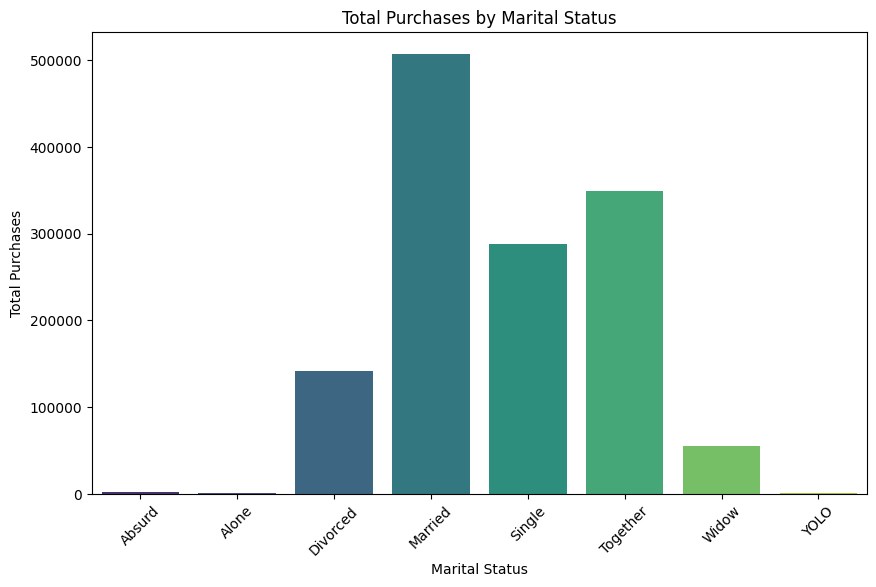

In [ ]:

purchase_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

marital_purchase_totals = df.groupby('Marital_Status')[purchase_columns].sum().sum(axis=1)

marital_purchase_df = marital_purchase_totals.reset_index()
marital_purchase_df.columns = ['Marital_Status', 'TotalPurchases']

print(marital_purchase_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='TotalPurchases', data=marital_purchase_df, palette='viridis')

plt.title('Total Purchases by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Unsupervised Machine Learning K-means Clustering Method

#data = df[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
data = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

label_encoder = LabelEncoder()
#data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data['Income'] = label_encoder.fit_transform(data['Income'])

#X = data[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
X = data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Split the data into training (70%) and testing (30%)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

<ipython-input-30-d31769a8b28b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'] = label_encoder.fit_transform(data['Income'])


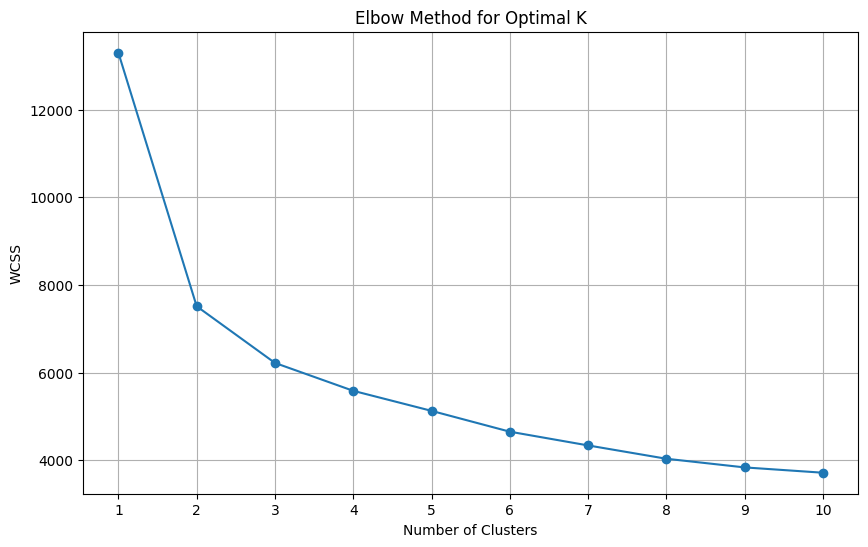

In [ ]:
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

scaler = StandardScaler()
E = scaler.fit_transform(df[purchase_columns])

# Elbow Method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(E)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
# Normalize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Using the optimal number of cluster based on the elbow method above
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train_scaled)

In [ ]:
# Normalize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict clusters for the test data
X_test['Cluster'] = kmeans.predict(X_test_scaled)

# Combining both the test and training data
X_combined = pd.concat([X_train, X_test], axis=0)

In [ ]:
X = df[purchase_columns]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

#cluster labels
labels = kmeans.labels_

df['Cluster'] = np.nan
df.loc[X.index, 'Cluster'] = labels

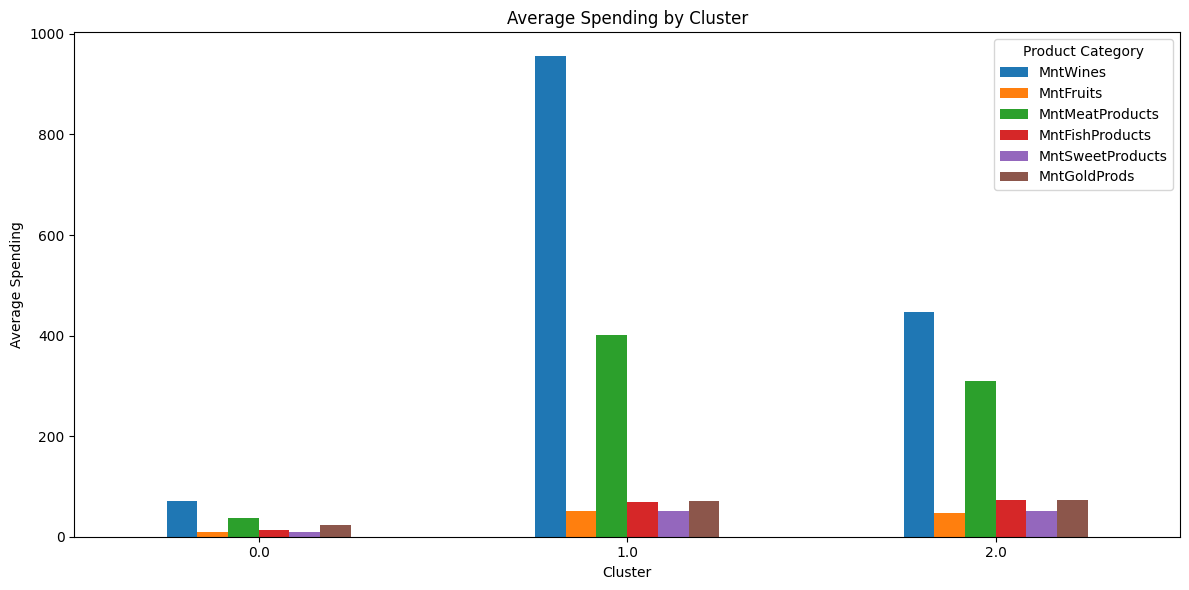

In [ ]:
cluster_summary = df.groupby('Cluster')[purchase_columns].mean()
cluster_summary.plot(kind='bar', figsize=(12, 6))

plt.title('Average Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

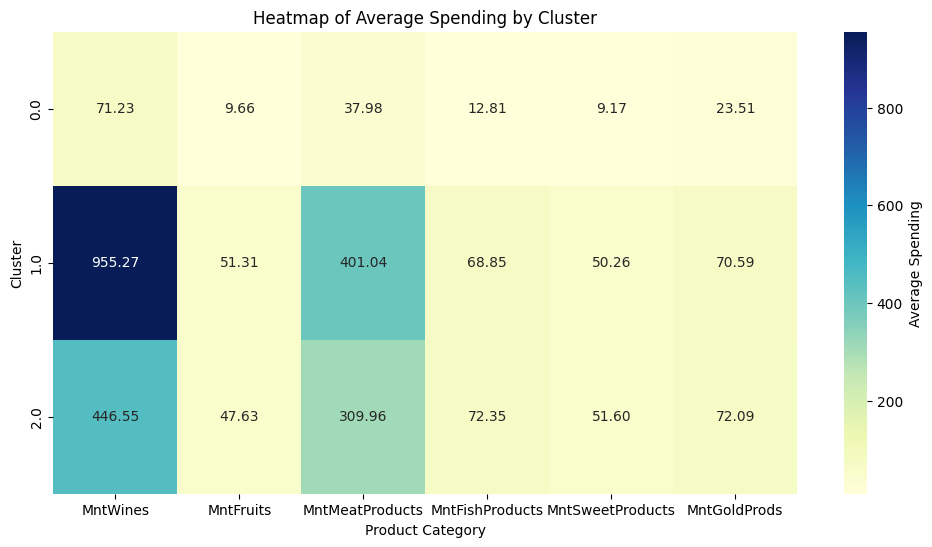

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Spending'})
plt.title('Heatmap of Average Spending by Cluster')
plt.xlabel('Product Category')
plt.ylabel('Cluster')
plt.show()

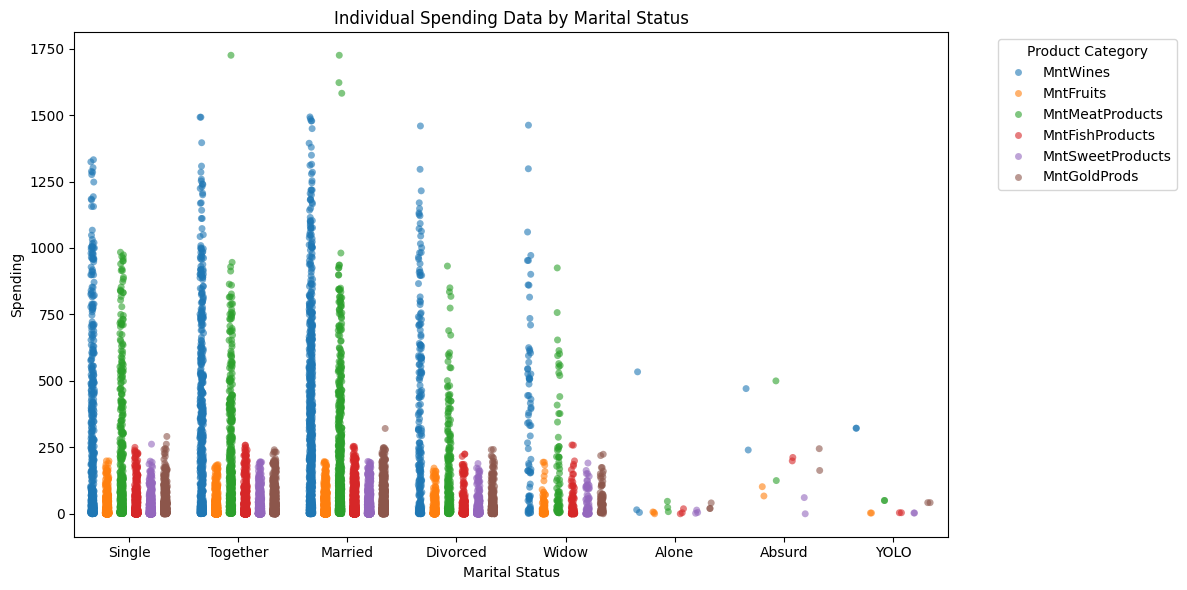

In [ ]:
melted_df = df.melt(id_vars='Marital_Status', value_vars=purchase_columns, var_name='Product', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.stripplot(data=melted_df, x='Marital_Status', y='Spending', hue='Product', dodge=True, jitter=True, alpha=0.6)
plt.title('Individual Spending Data by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Spending')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2216 non-null   object  
 1   Year_Birth           2216 non-null   object  
 2   Education            2216 non-null   object  
 3   Marital_Status       2216 non-null   object  
 4   Income               2216 non-null   int64   
 5   Kidhome              2216 non-null   object  
 6   Teenhome             2216 non-null   object  
 7   Dt_Customer          2216 non-null   object  
 8   Recency              2216 non-null   object  
 9   MntWines             2216 non-null   int64   
 10  MntFruits            2216 non-null   int64   
 11  MntMeatProducts      2216 non-null   int64   
 12  MntFishProducts      2216 non-null   int64   
 13  MntSweetProducts     2216 non-null   int64   
 14  MntGoldProds         2216 non-null   int64   
 15  NumDealsPurchases    

In [ ]:
df = df.drop(['Year_Birth', 'Education'], axis=1)

In [ ]:
df

,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Income_Category,WCons,MCons,FCons,SCons,FrCons,GPCons,Cluster
0,5524,Single,58138,0,0,04-09-2012,58,635,88,546,...,11,1,Medium,High,High,High,High,High,High,2.0
1,2174,Single,46344,1,1,08-03-2014,38,11,1,6,...,11,0,Medium,Low,Low,Low,Low,Low,Low,0.0
2,4141,Together,71613,0,0,21-08-2013,26,426,49,127,...,11,0,High,High,Medium,High,Medium,High,Medium,2.0
3,6182,Together,26646,1,0,10-02-2014,26,11,4,20,...,11,0,Low,Low,Low,Medium,Low,Medium,Low,0.0
4,5324,Married,58293,1,0,19-01-2014,94,173,43,118,...,11,0,Medium,Medium,Medium,High,High,High,Medium,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,Married,61223,0,1,13-06-2013,46,709,43,182,...,11,0,Medium,High,High,High,High,High,High,2.0
2212,4001,Together,64014,2,1,10-06-2014,56,406,0,30,...,11,0,High,High,Medium,Low,Low,Low,Low,2.0
2213,7270,Divorced,56981,0,0,25-01-2014,91,908,48,217,...,11,0,Medium,High,High,High,Medium,High,Medium,1.0
2214,8235,Together,69245,0,1,24-01-2014,8,428,30,214,...,11,0,High,High,High,High,High,High,High,2.0


In [ ]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Income_Category'] = pd.qcut(df['Income'], 3, labels=['Low', 'Medium', 'High'])
print(df['Income_Category'])

0       Medium
1       Medium
2         High
3          Low
4       Medium
         ...  
2211    Medium
2212      High
2213    Medium
2214      High
2215    Medium
Name: Income_Category, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntWines'] = pd.to_numeric(df['MntWines'], errors='coerce')
df['WCons'] = pd.qcut(df['MntWines'], 3, labels=['Low', 'Medium', 'High'])
print(df['WCons'])

0         High
1          Low
2         High
3          Low
4       Medium
         ...  
2211      High
2212      High
2213      High
2214      High
2215    Medium
Name: WCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntMeatProducts'] = pd.to_numeric(df['MntMeatProducts'], errors='coerce')
df['MCons'] = pd.qcut(df['MntMeatProducts'], 3, labels=['Low', 'Medium', 'High'])
print(df['MCons'])

0         High
1          Low
2       Medium
3          Low
4       Medium
         ...  
2211      High
2212    Medium
2213      High
2214      High
2215    Medium
Name: MCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntFishProducts'] = pd.to_numeric(df['MntFishProducts'], errors='coerce')
df['FCons'] = pd.qcut(df['MntFishProducts'], 3, labels=['Low', 'Medium', 'High'])
print(df['FCons'])

0         High
1          Low
2         High
3       Medium
4         High
         ...  
2211      High
2212       Low
2213      High
2214      High
2215       Low
Name: FCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntSweetProducts'] = pd.to_numeric(df['MntSweetProducts'], errors='coerce')
df['SCons'] = pd.qcut(df['MntSweetProducts'], 3, labels=['Low', 'Medium', 'High'])
print(df['SCons'])

0         High
1          Low
2       Medium
3          Low
4         High
         ...  
2211      High
2212       Low
2213    Medium
2214      High
2215       Low
Name: SCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntFruits'] = pd.to_numeric(df['MntFruits'], errors='coerce')
df['FrCons'] = pd.qcut(df['MntFruits'], 3, labels=['Low', 'Medium', 'High'])
print(df['FrCons'])

0         High
1          Low
2         High
3       Medium
4         High
         ...  
2211      High
2212       Low
2213      High
2214      High
2215       Low
Name: FrCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df['MntGoldProds'] = pd.to_numeric(df['MntGoldProds'], errors='coerce')
df['GPCons'] = pd.qcut(df['MntGoldProds'], 3, labels=['Low', 'Medium', 'High'])
print(df['GPCons'])

0         High
1          Low
2       Medium
3          Low
4       Medium
         ...  
2211      High
2212       Low
2213    Medium
2214      High
2215    Medium
Name: GPCons, Length: 2216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
df_data = df[['Income_Category', 'WCons', 'MCons', 'FCons', 'SCons', 'FrCons', 'GPCons']]

df_data

,Income_Category,WCons,MCons,FCons,SCons,FrCons,GPCons
0,Medium,High,High,High,High,High,High
1,Medium,Low,Low,Low,Low,Low,Low
2,High,High,Medium,High,Medium,High,Medium
3,Low,Low,Low,Medium,Low,Medium,Low
4,Medium,Medium,Medium,High,High,High,Medium
...,...,...,...,...,...,...,...
2211,Medium,High,High,High,High,High,High
2212,High,High,Medium,Low,Low,Low,Low
2213,Medium,High,High,High,Medium,High,Medium
2214,High,High,High,High,High,High,High


In [ ]:
le_income = LabelEncoder()
df_data['Income_Category_encoded'] = le_income.fit_transform(df_data['Income_Category'])

le_wine = LabelEncoder()
df_data['WCons_encoded'] = le_wine.fit_transform(df_data['WCons'])

le_meat = LabelEncoder()
df_data['MCons_encoded'] = le_meat.fit_transform(df_data['MCons'])

le_fish = LabelEncoder()
df_data['FCons_encoded'] = le_fish.fit_transform(df_data['FCons'])

le_sweets = LabelEncoder()
df_data['SCons_encoded'] = le_sweets.fit_transform(df_data['SCons'])

le_fruits = LabelEncoder()
df_data['FrCons_encoded'] = le_fruits.fit_transform(df_data['FrCons'])

le_gold = LabelEncoder()
df_data['GPCons_encoded'] = le_gold.fit_transform(df_data['GPCons'])

df_data

<ipython-input-21-4d98c3d62529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Income_Category_encoded'] = le_income.fit_transform(df_data['Income_Category'])
<ipython-input-21-4d98c3d62529>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['WCons_encoded'] = le_wine.fit_transform(df_data['WCons'])
<ipython-input-21-4d98c3d62529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Income_Category,WCons,MCons,FCons,SCons,FrCons,GPCons,Income_Category_encoded,WCons_encoded,MCons_encoded,FCons_encoded,SCons_encoded,FrCons_encoded,GPCons_encoded
0,Medium,High,High,High,High,High,High,2,0,0,0,0,0,0
1,Medium,Low,Low,Low,Low,Low,Low,2,1,1,1,1,1,1
2,High,High,Medium,High,Medium,High,Medium,0,0,2,0,2,0,2
3,Low,Low,Low,Medium,Low,Medium,Low,1,1,1,2,1,2,1
4,Medium,Medium,Medium,High,High,High,Medium,2,2,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Medium,High,High,High,High,High,High,2,0,0,0,0,0,0
2212,High,High,Medium,Low,Low,Low,Low,0,0,2,1,1,1,1
2213,Medium,High,High,High,Medium,High,Medium,2,0,0,0,2,0,2
2214,High,High,High,High,High,High,High,0,0,0,0,0,0,0


In [ ]:
prod = ['WCons_encoded', 'MCons_encoded', 'FCons_encoded', 'SCons_encoded', 'FrCons_encoded', 'GPCons_encoded']

X = df_data[prod]
Y = df_data['Income_Category_encoded']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
summary_list = df_data['Income_Category'].unique().tolist()

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=prod, class_names=summary_list, rounded=True, proportion=True)
plt.show()

NameError: name 'plt' is not defined